# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
start_wall_time=time.time()
start_runtime=time.process_time()
df = pd.read_csv(R'C:\Users\nikhi\Downloads\kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


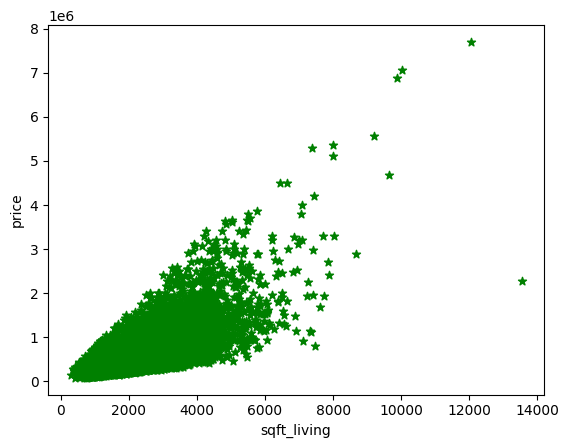

In [3]:
#Scatter plot for sqft living vs price
%matplotlib inline
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(df.sqft_living,df.price,color='green',marker='*')

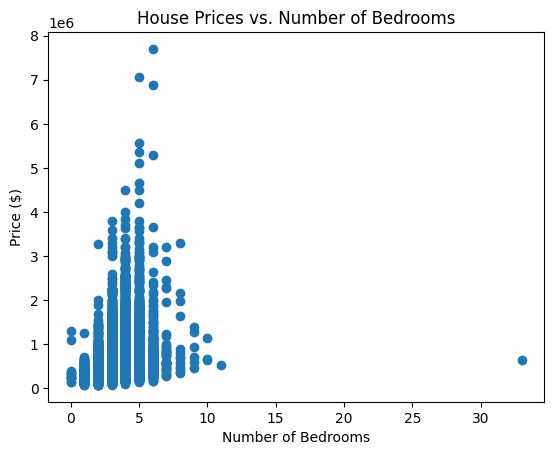

In [4]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.title('House Prices vs. Number of Bedrooms')
plt.show()


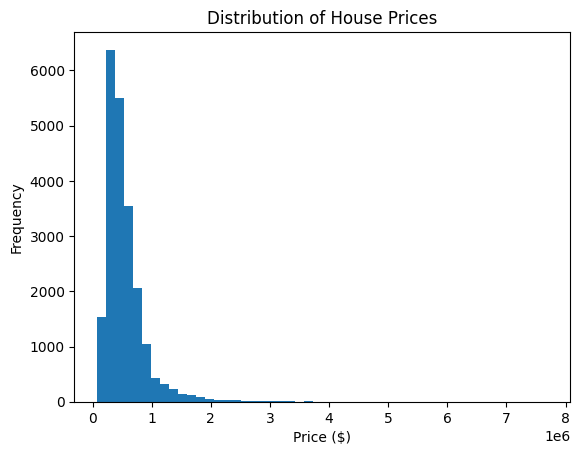

In [5]:
#Histogram of house prices
plt.hist(df['price'], bins=50)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

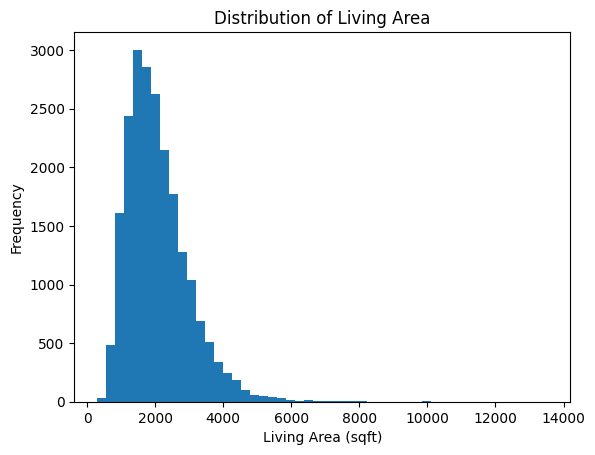

In [6]:
# Histogram of living area
plt.hist(df['sqft_living'], bins=50)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Living Area')
plt.show()


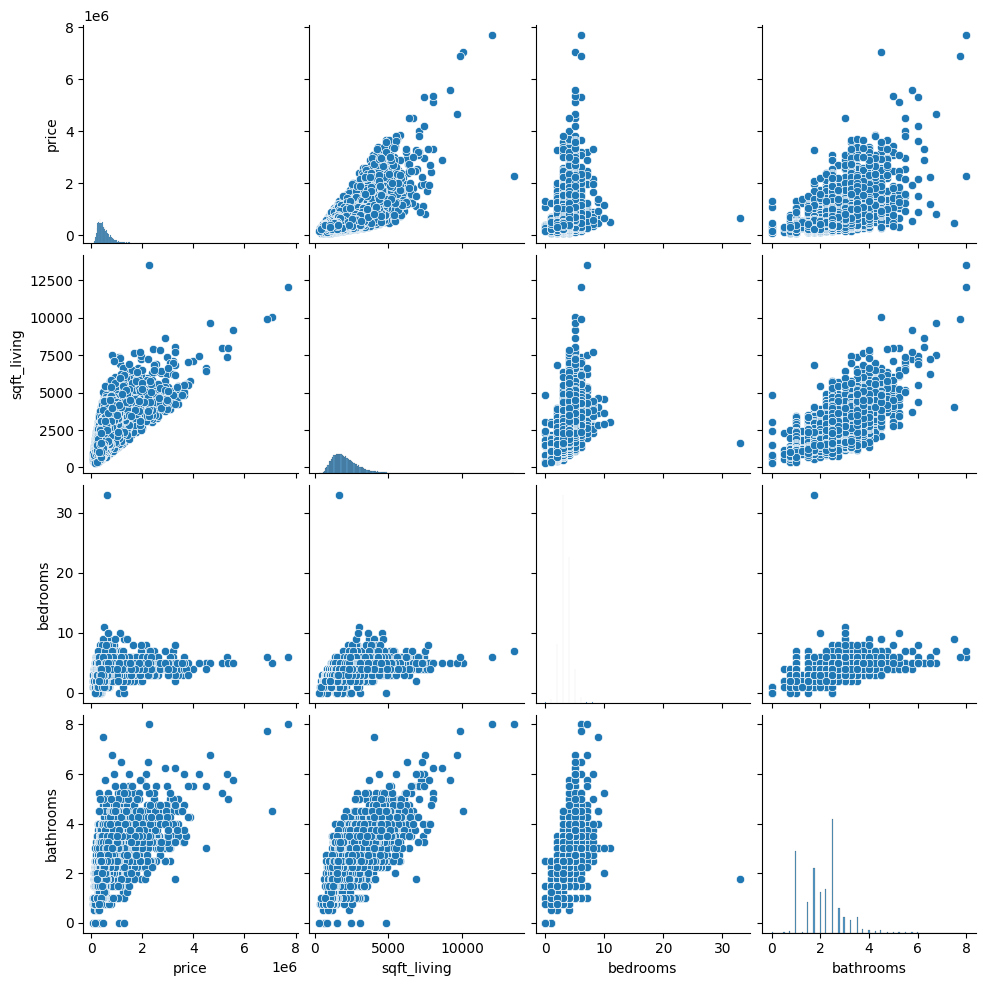

In [7]:
#Pairwise scatterplot

sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms']])
plt.show()


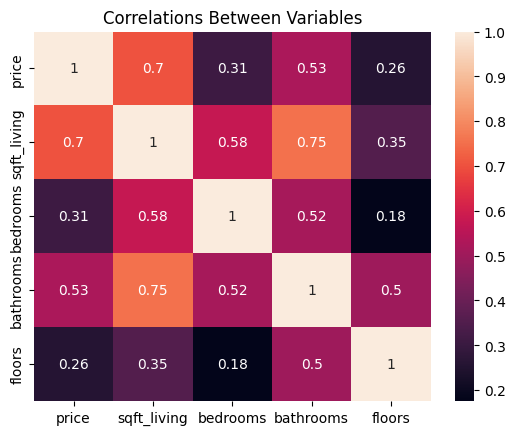

In [8]:
# Heatmap of correlation
corr = df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlations Between Variables')
plt.show()


From the heatmap we could say that the sqft living has highest correlation, which is prime Reason for selecting Square Footage of the Living Area as a Feature

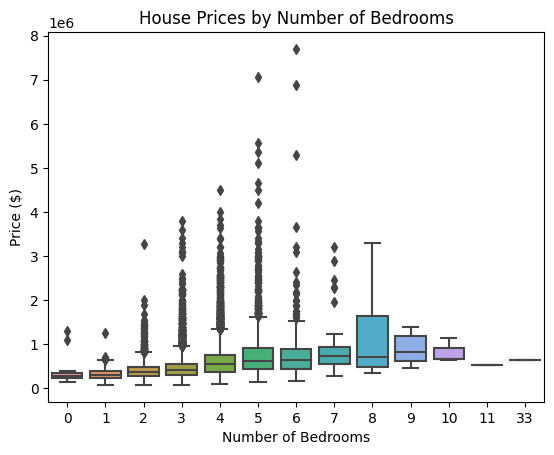

In [9]:
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('House Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.show()


In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Reasons for selecting Square Footage of the Living Area as a Feature:
Square footage of the living area is a common and significant feature that affects house prices. In general, houses with a larger living area tend to be more expensive than houses with a smaller living area. 

In [11]:
# Selecting the feature living area of the house to use for the regression model
X = df["sqft_living"].values.reshape(-1, 1)
y = df["price"].values

I have done the training/test split by choosing the 80% of data for training and 20% of data for testing because it provides a good balance between having enough data to train a model effectively and having enough data to test the model's performance.

In [12]:
# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [13]:
X_train

array([[1570],
       [1780],
       [1090],
       ...,
       [2360],
       [2370],
       [2380]], dtype=int64)

In [14]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
X_train

array([[-0.55395019],
       [-0.32648492],
       [-1.07387079],
       ...,
       [ 0.30175248],
       [ 0.31258416],
       [ 0.32341584]])

In [16]:
#cost function (mean squared error)
def cost_function(X, y, Theta):
    a = len(y)
    predictions = X.dot(Theta)
    cost = (1/2*a) * np.sum(np.square(predictions-y))
    return cost

In [17]:
# the gradient descent function
def gradient_descent(X, y, Theta, learning_rate=0.01, iterations=1000):
    a = len(y)
    cost_history = np.zeros(iterations)
    Theta_history = np.zeros((iterations, 2))
    for i in range(iterations):
        predictions = X.dot(Theta)
        error = np.dot(X.transpose(), (predictions - y))
        Theta -= learning_rate * 1/a * error
        Theta_history[i,:] = Theta.T
        cost_history[i] = cost_function(X, y, Theta)
    return Theta, cost_history, Theta_history

In [18]:
# Setting the initial values for the parameters
Theta = np.random.randn(2,1)

# Add a column of 1's to the input data to represent the bias term
X_b = np.c_[np.ones((len(X_train),1)), X_train]


In [19]:
# RunNING the gradient descent algorithm to train the model
Theta, cost_history, Theta_history = gradient_descent(X_b, y_train.reshape(-1,1), Theta, learning_rate=0.1, iterations=1000)


In [20]:
# the final values for the parameters
print("Theta0:", Theta[0])
print("Theta1:", Theta[1])


Theta0: [542799.8377675]
Theta1: [262164.84832492]


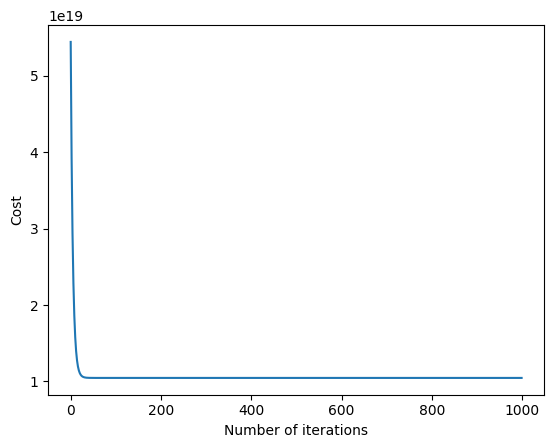

In [21]:
# Plotting the cost function as a function of the number of iterations
plt.plot(range(1000), cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()


In [22]:
# Make predictions on the test set using the trained model
y_pred = Theta[0] + Theta[1]*X_test


In [23]:
end_wall_time=time.time()
end_runtime=time.process_time()
print(f"Wall clock time  is {end_wall_time-start_wall_time} seconds")
print(f"Run time is {end_runtime-start_runtime} seconds")

Wall clock time  is 3.197760820388794 seconds
Run time is 1.234375 seconds


In [24]:
# the mean squared error of the predictions
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 61940787124.624725


In [25]:
# the mean absolute error of the predictions
from sklearn.metrics import mean_absolute_error
print("Mean absolute Error:", mean_absolute_error(y_test, y_pred))

Mean absolute Error: 170780.92628145567


In [26]:
#the Root mean squared error of the predictions
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 248879.0612418504


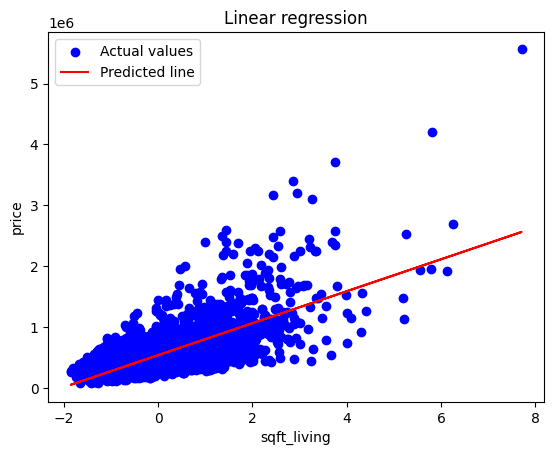

In [27]:
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Predicted line')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Linear regression')
plt.legend()
plt.show()


R-squared on training data: 0.49552283606032765
R-squared on test data: 0.47915772372653764


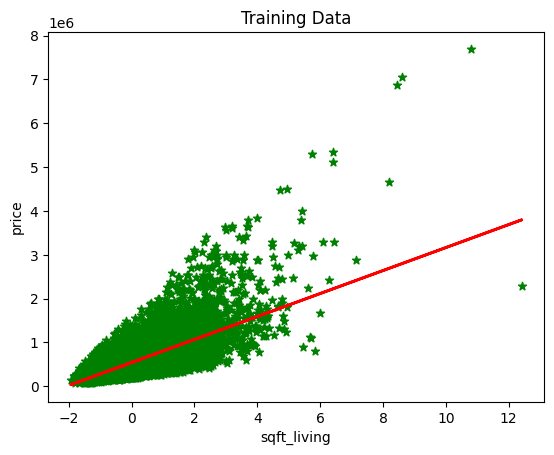

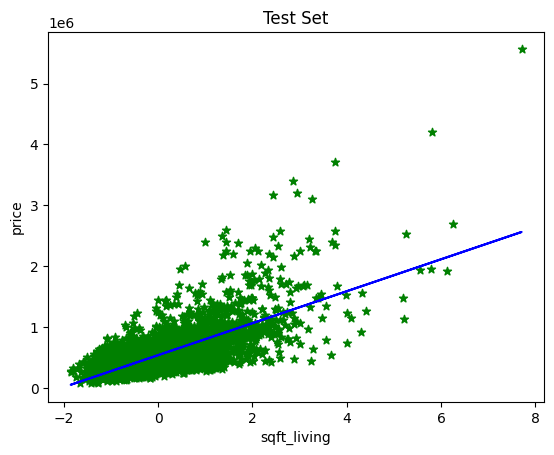

In [28]:
# Calculate the R-squared value on the training data
from sklearn.metrics import r2_score
y_train_pred = Theta[0] + Theta[1]*X_train
r2_train = r2_score(y_train, y_train_pred)
print("R-squared on training data:", r2_train)

# Calculate the R-squared value on the test data
y_test_pred = Theta[0] + Theta[1]*X_test
r2_test = r2_score(y_test, y_test_pred)
print("R-squared on test data:", r2_test)

# Plot the training data and the regression line
plt.scatter(X_train, y_train, color='green', marker='*')
plt.plot(X_train, y_train_pred, color='red', linewidth=2)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Training Data')
plt.show()

# Plot the model and the data points on the test set
plt.scatter(X_test, y_test, color='green', marker='*')
plt.plot(X_test, y_test_pred, color='blue')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Test Set')
plt.show()


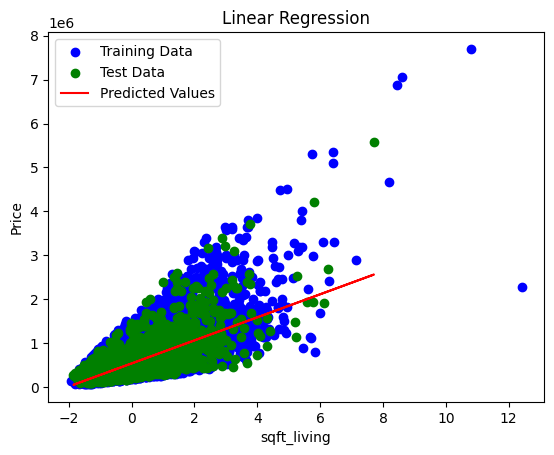

In [29]:

import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test Data')


# Plot the predicted values
plt.plot(X_test, y_pred, color='red', label='Predicted Values')

# Add labels and legend
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()


In [30]:
# implementing simple linear regression to the Training Set 
from sklearn.linear_model import LinearRegression 
reg= LinearRegression()
reg.fit(X_train, y_train)



LinearRegression()

In [31]:
#Predicting the prices
pred = reg.predict(X_test)

In [32]:
pred

array([ 357817.97314081, 1277876.09832343,  360657.65871236, ...,
        337940.17413995,  221513.06570635,  417451.37014339])

In [33]:
reg.intercept_

542799.8377674957

In [34]:
reg.coef_

array([262164.84832492])

In [35]:
X_test

array([[-0.7055937 ],
       [ 2.80387041],
       [-0.69476202],
       ...,
       [-0.78141545],
       [-1.22551431],
       [-0.47812843]])

In [36]:
# y = mx + c
# pred = reg.coef_ * X_test + reg.intercept_
X_test*262164.84832492+542799.8377674957


array([[ 357817.97314081],
       [1277876.09832344],
       [ 360657.65871236],
       ...,
       [ 337940.17413995],
       [ 221513.06570634],
       [ 417451.37014338]])

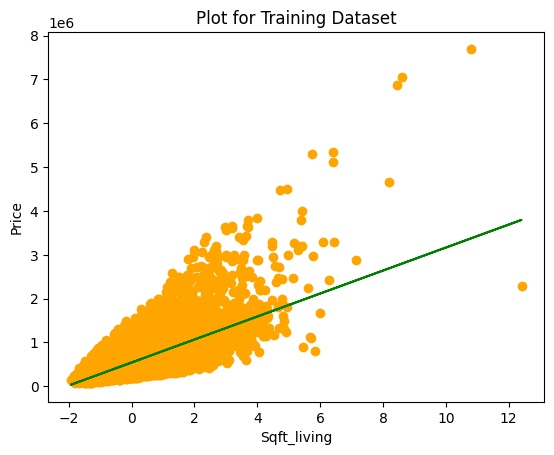

In [37]:
plt.scatter(X_train, y_train, color='orange')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title ("Plot for Training Dataset")
plt.xlabel("Sqft_living")
plt.ylabel("Price")
plt.show()

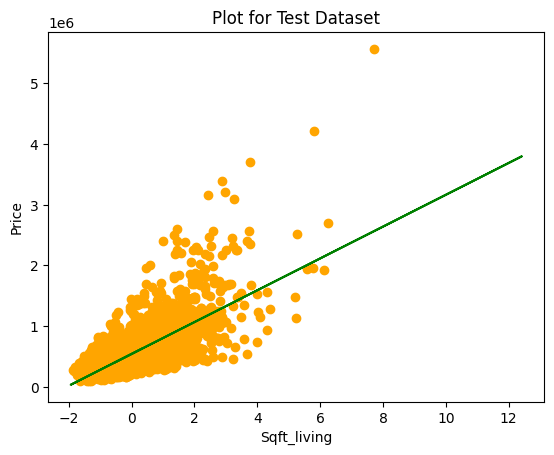

In [38]:
plt.scatter(X_test, y_test, color='orange')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title ("Plot for Test Dataset")
plt.xlabel("Sqft_living")
plt.ylabel("Price")
plt.show()